In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("Nashik.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,WS50M,WD50M
0,2012,4,1,5,22.47,39.19,0.0,2.94,13.85
1,2012,4,1,6,23.50,36.44,0.0,3.09,17.66
2,2012,4,1,7,27.74,28.00,0.0,2.89,18.29
3,2012,4,1,8,32.95,18.12,0.0,3.40,40.16
4,2012,4,1,9,36.08,13.12,0.0,3.51,58.58
...,...,...,...,...,...,...,...,...,...
87643,2022,4,1,0,22.23,28.81,0.0,2.91,277.09
87644,2022,4,1,1,21.68,28.31,0.0,2.90,280.86
87645,2022,4,1,2,21.01,28.25,0.0,3.10,287.93
87646,2022,4,1,3,20.40,28.88,0.0,3.25,296.07


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
WS50M          0.0
WD50M          0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'RH2M', 'PRECTOTCORR', 'WS50M', 'WD50M']


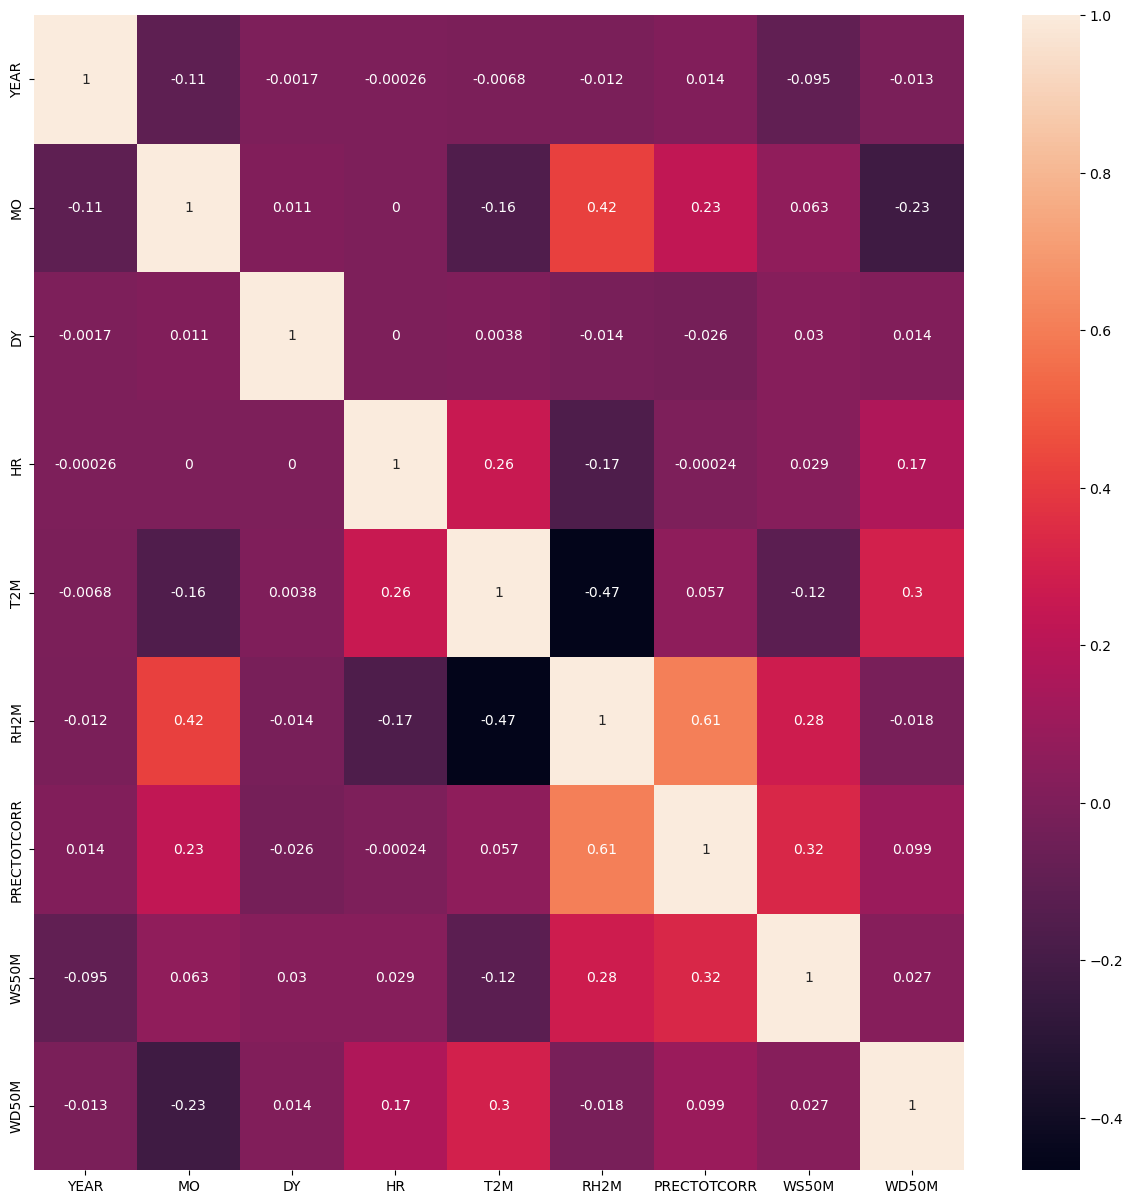

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

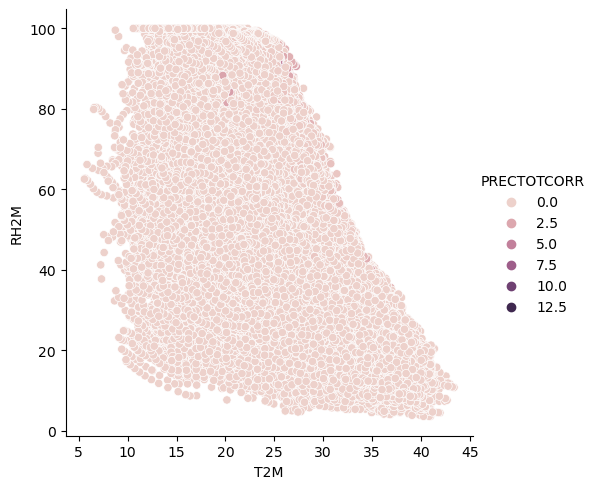

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


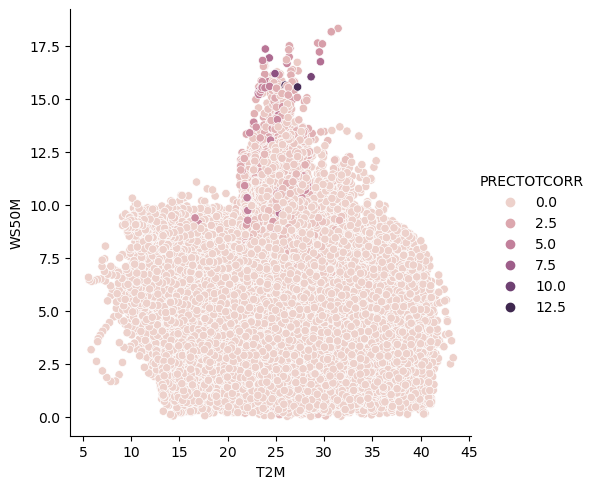

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


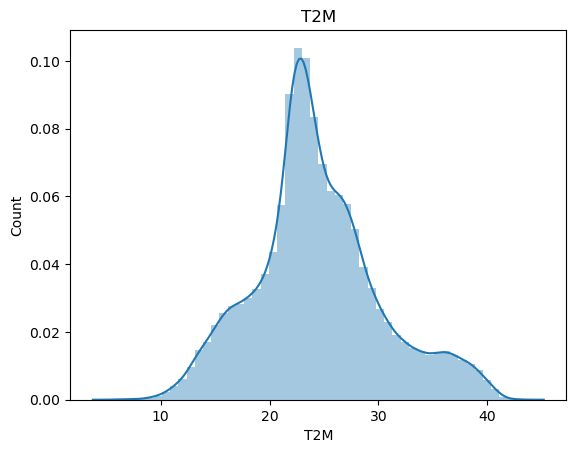

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


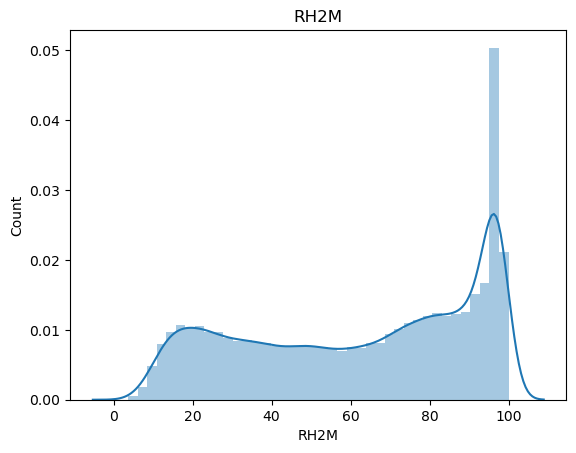

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


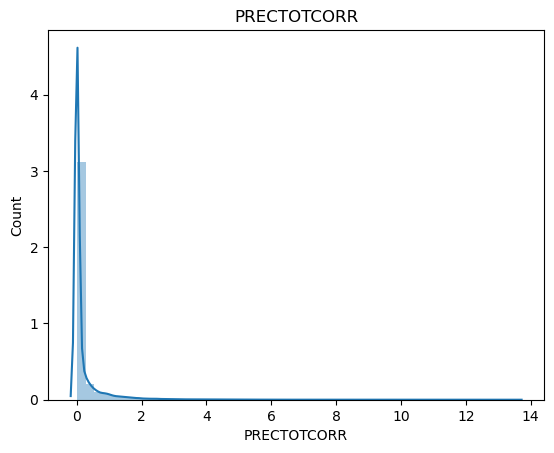

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


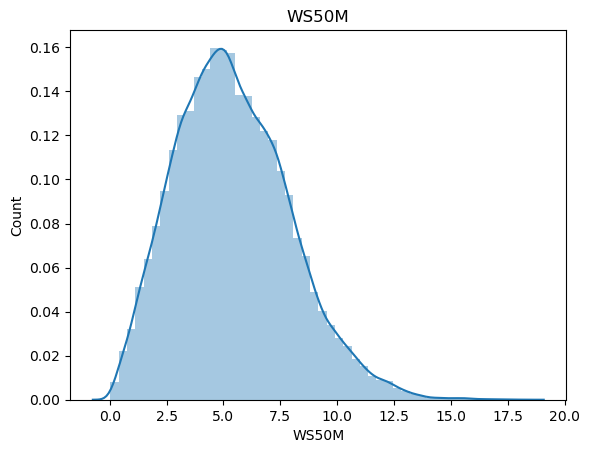

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


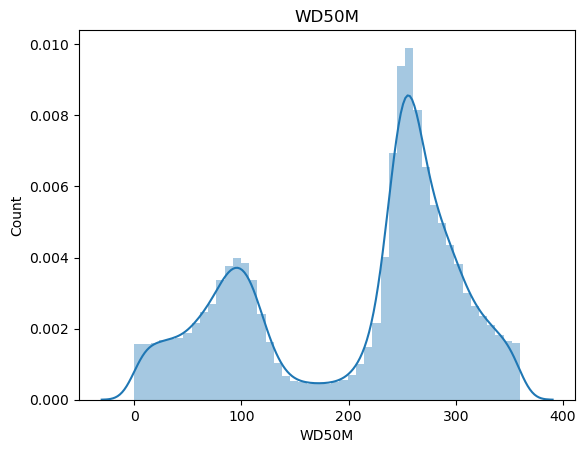

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

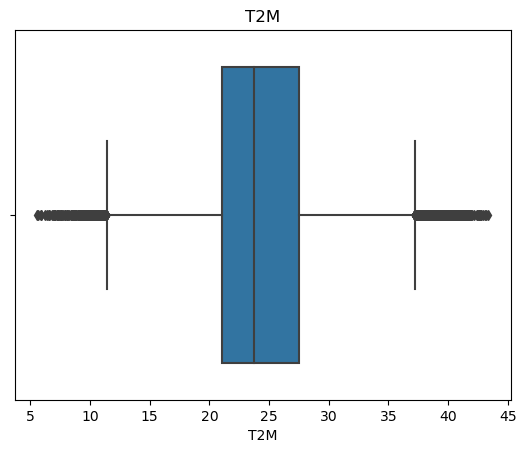

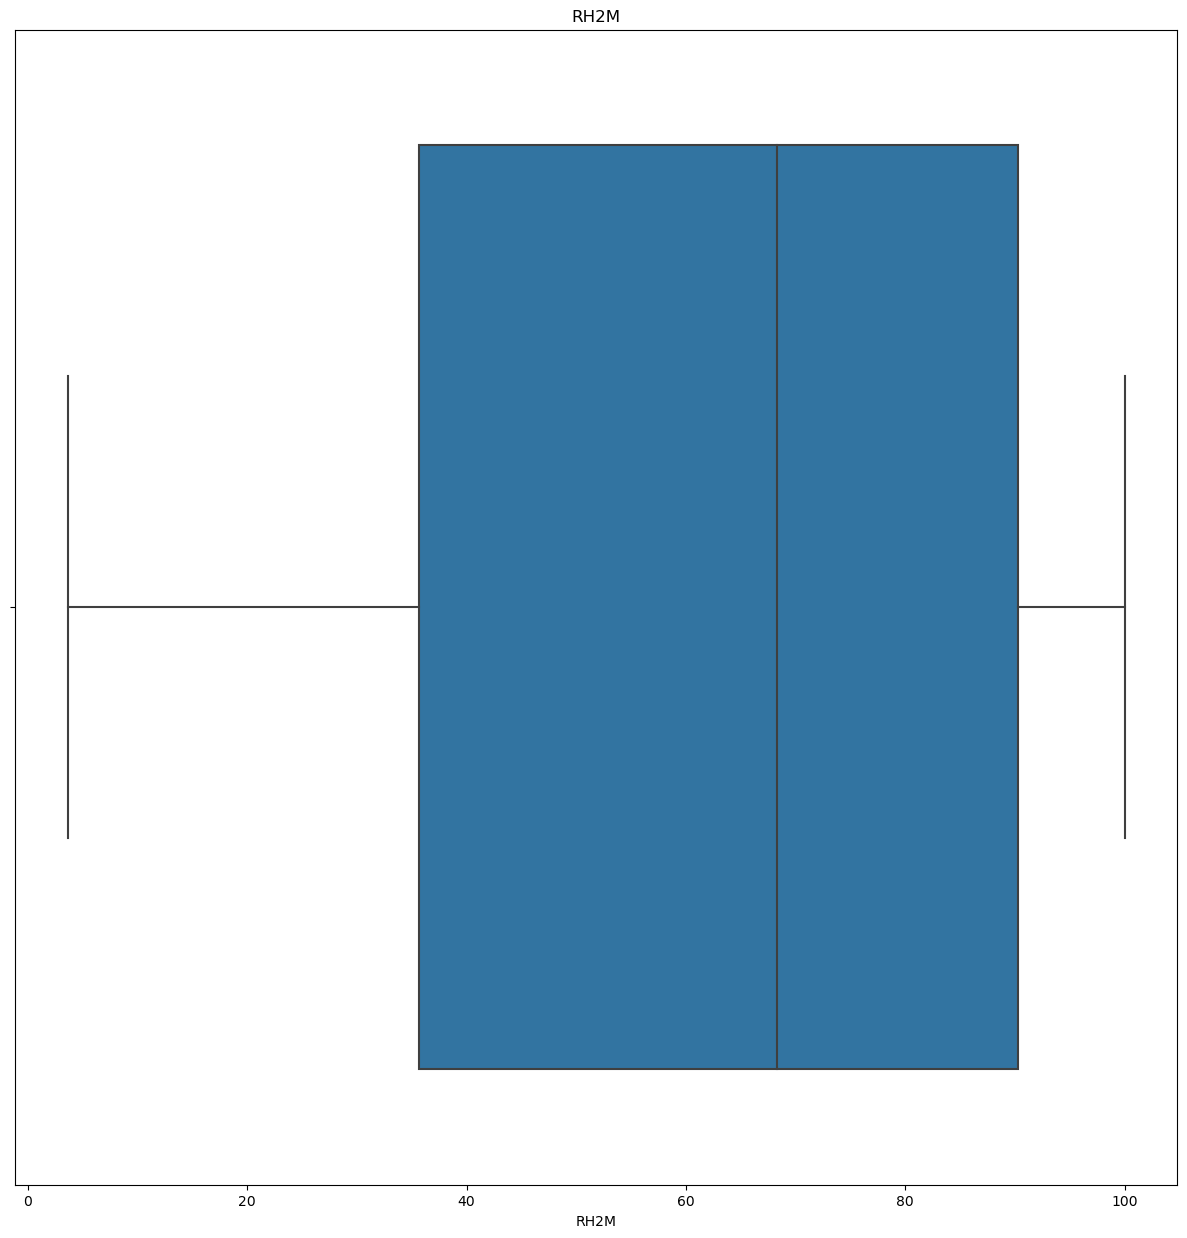

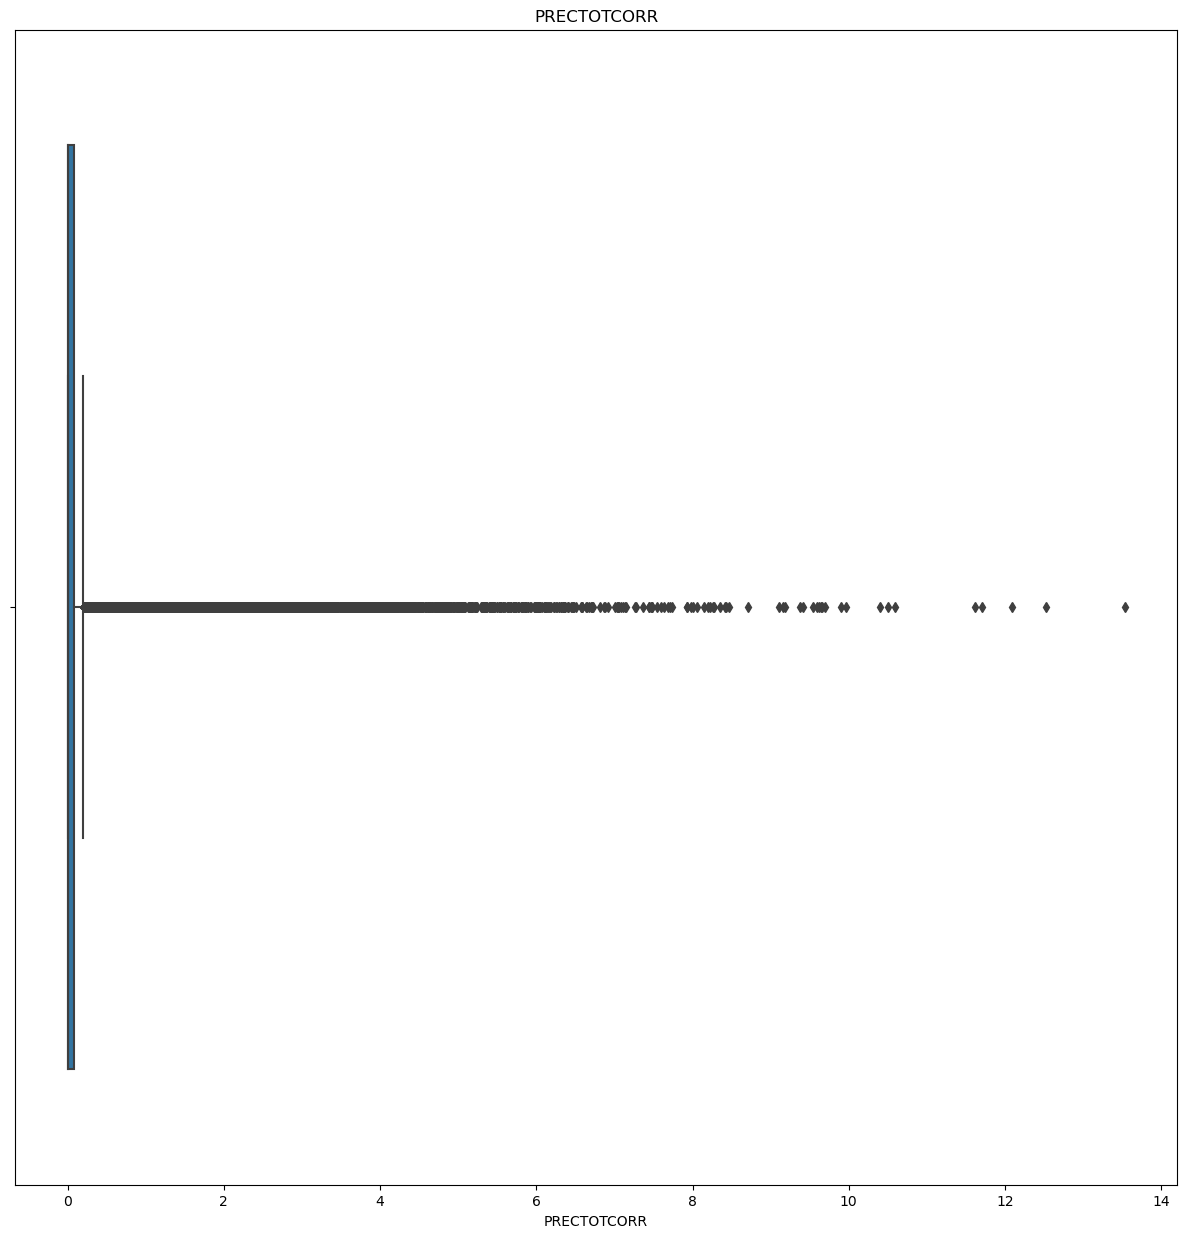

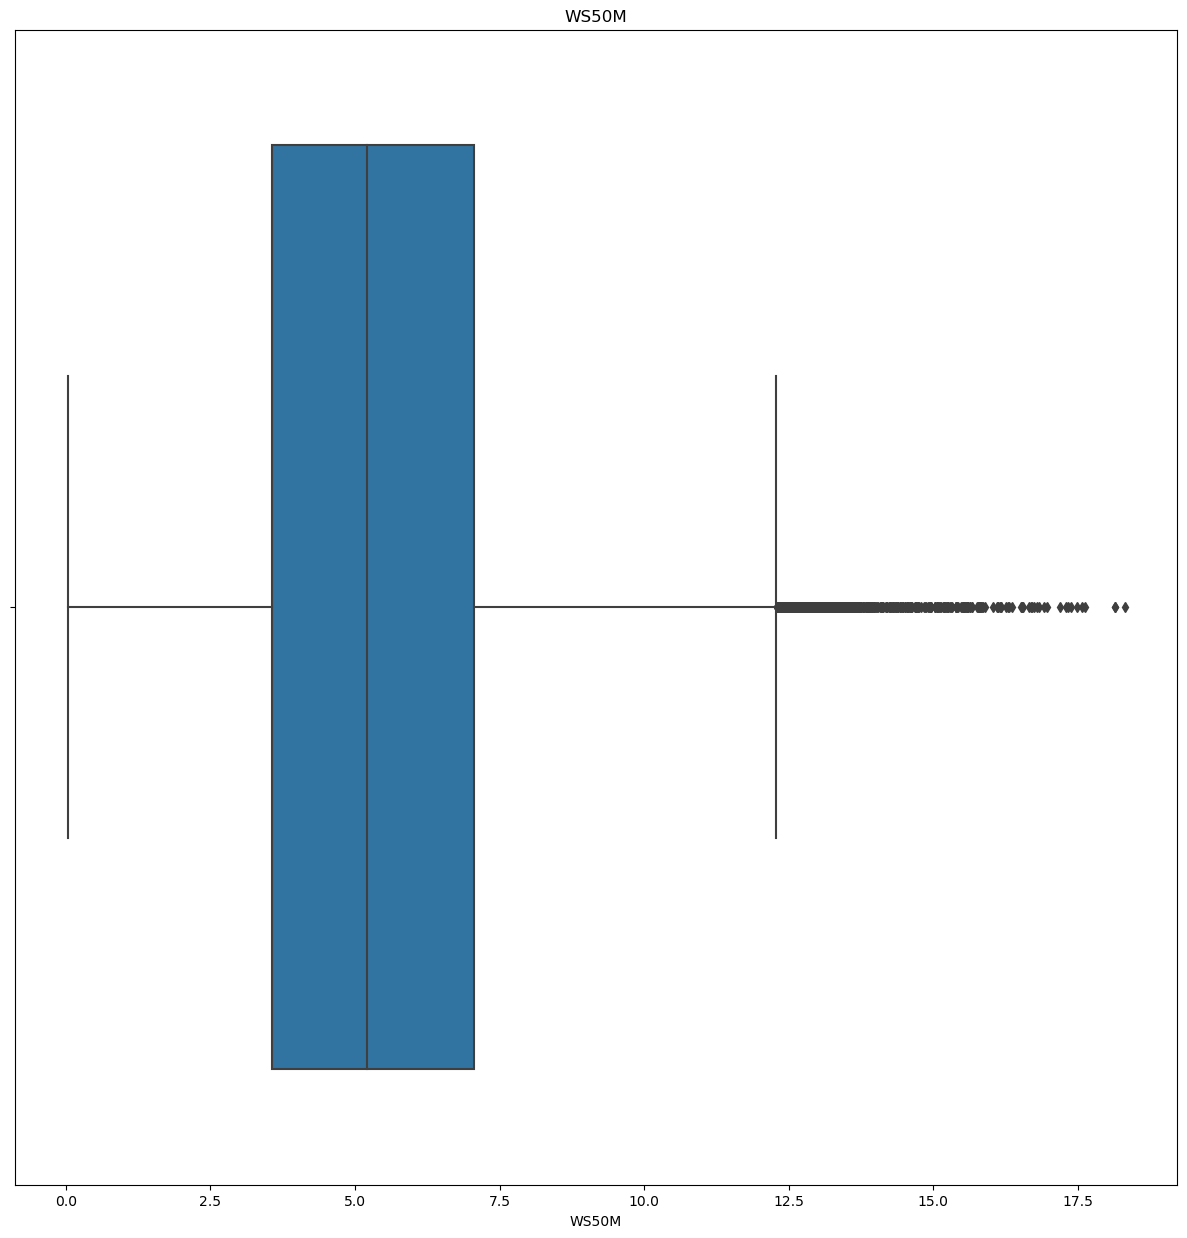

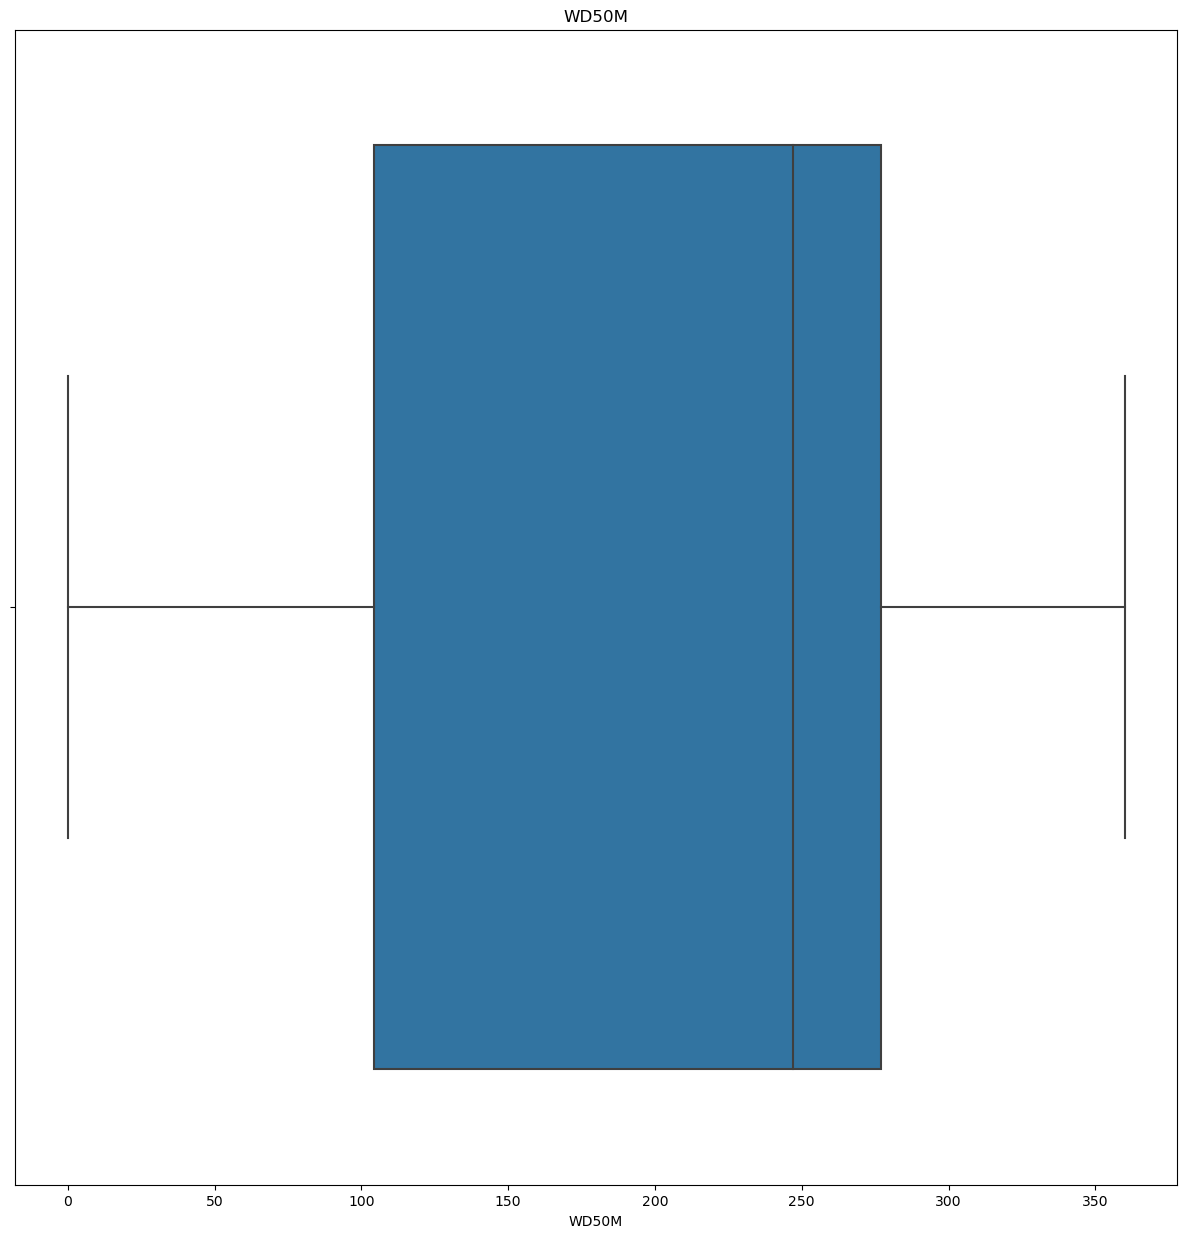

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[22.47 23.5  27.74 ...  9.37 10.46 10.36]
<class 'numpy.ndarray'>
[0.000e+00 1.000e-02 3.000e-02 1.100e-01 7.000e-02 2.000e-02 5.000e-02
 6.000e-02 4.000e-02 1.500e-01 2.000e-01 2.700e-01 2.400e-01 4.400e-01
 7.900e-01 2.200e-01 3.600e-01 4.700e-01 5.500e-01 6.600e-01 5.800e-01
 8.700e-01 2.040e+00 8.000e-02 9.000e-02 1.200e-01 1.900e-01 1.600e-01
 1.800e-01 2.300e-01 3.800e-01 1.000e-01 1.600e+00 3.040e+00 2.530e+00
 3.510e+00 2.230e+00 9.200e-01 2.500e-01 2.280e+00 4.000e-01 1.300e-01
 1.700e-01 2.100e-01 3.400e-01 3.900e-01 5.100e-01 5.700e-01 6.900e-01
 9.400e-01 1.280e+00 1.420e+00 1.540e+00 1.960e+00 1.500e+00 1.260e+00
 1.460e+00 1.680e+00 1.490e+00 1.310e+00 1.160e+00 1.140e+00 1.020e+00
 9.100e-01 7.600e-01 8.200e-01 8.900e-01 3.500e-01 4.900e-01 1.070e+00
 1.090e+00 1.120e+00 1.100e+00 6.000e-01 3.100e-01 3.000e-01 2.600e-01
 2.800e-01 5.600e-01 1.400e-01 3.200e-01 3.300e-01 4.100e-01 6.500e-01
 8.600e-01 1.000e+00 7.800e-01 5.300e-01 3.700e-01 4.200e-01 7.700e-01
 7.200e-01 

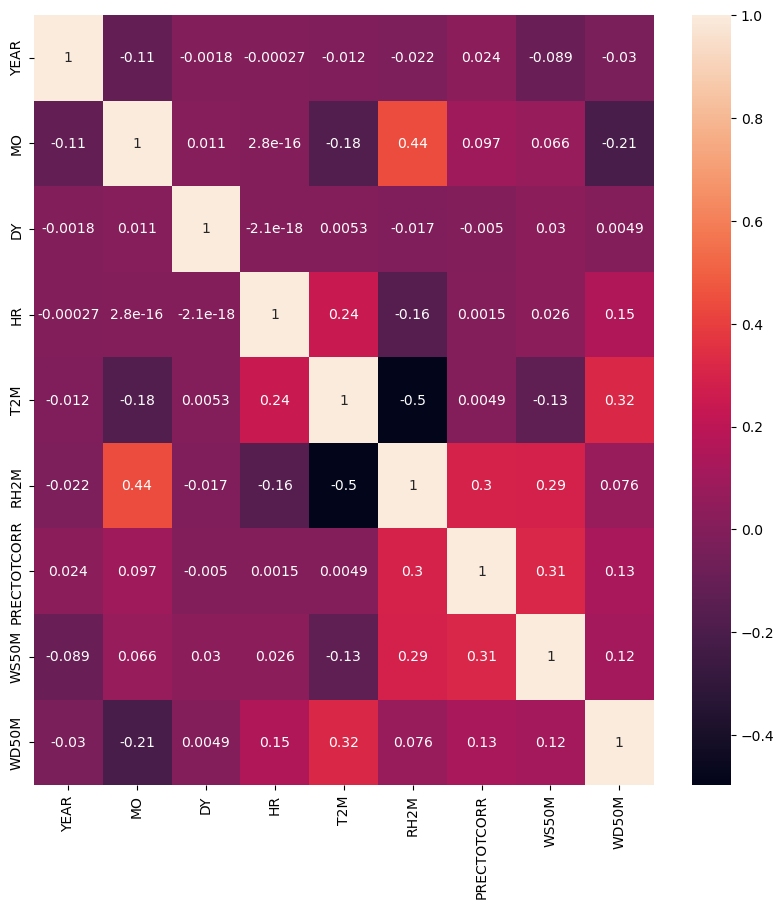

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


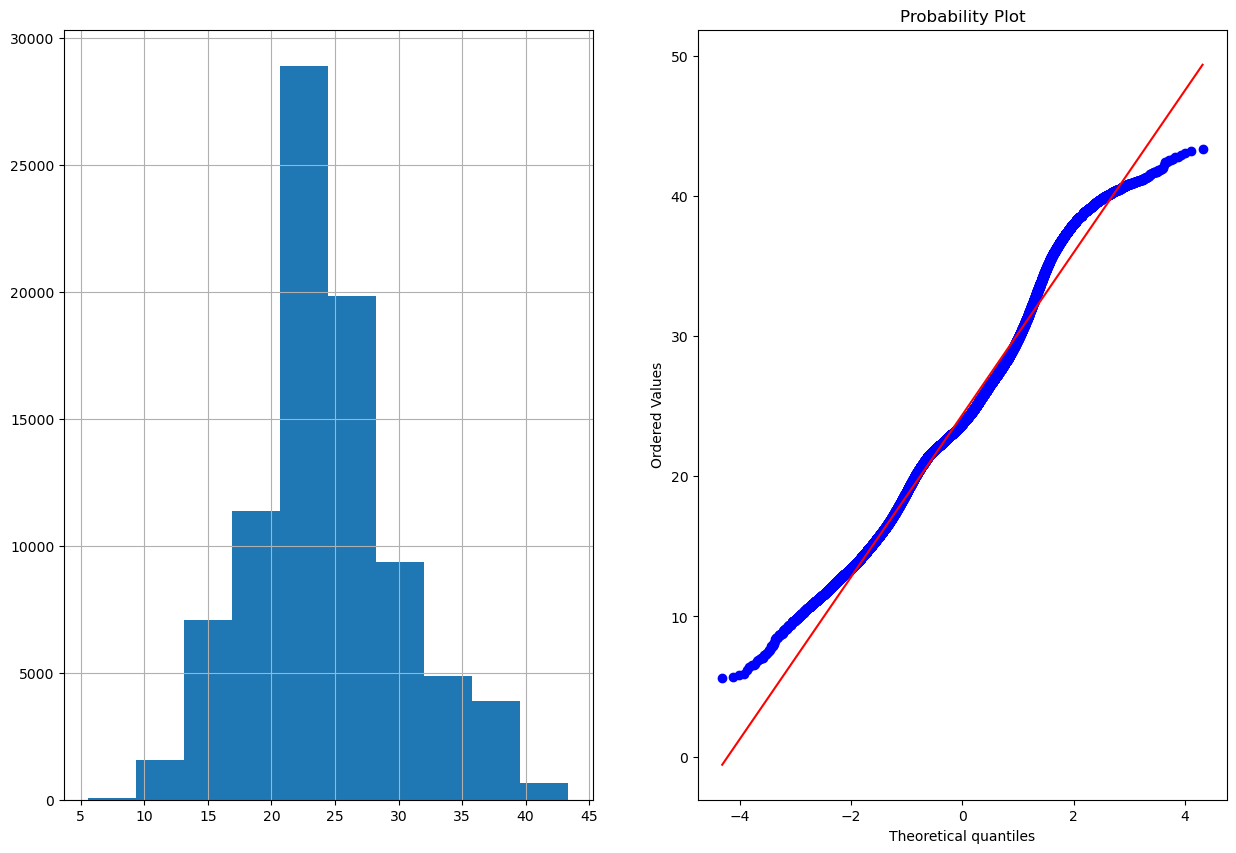

RH2M


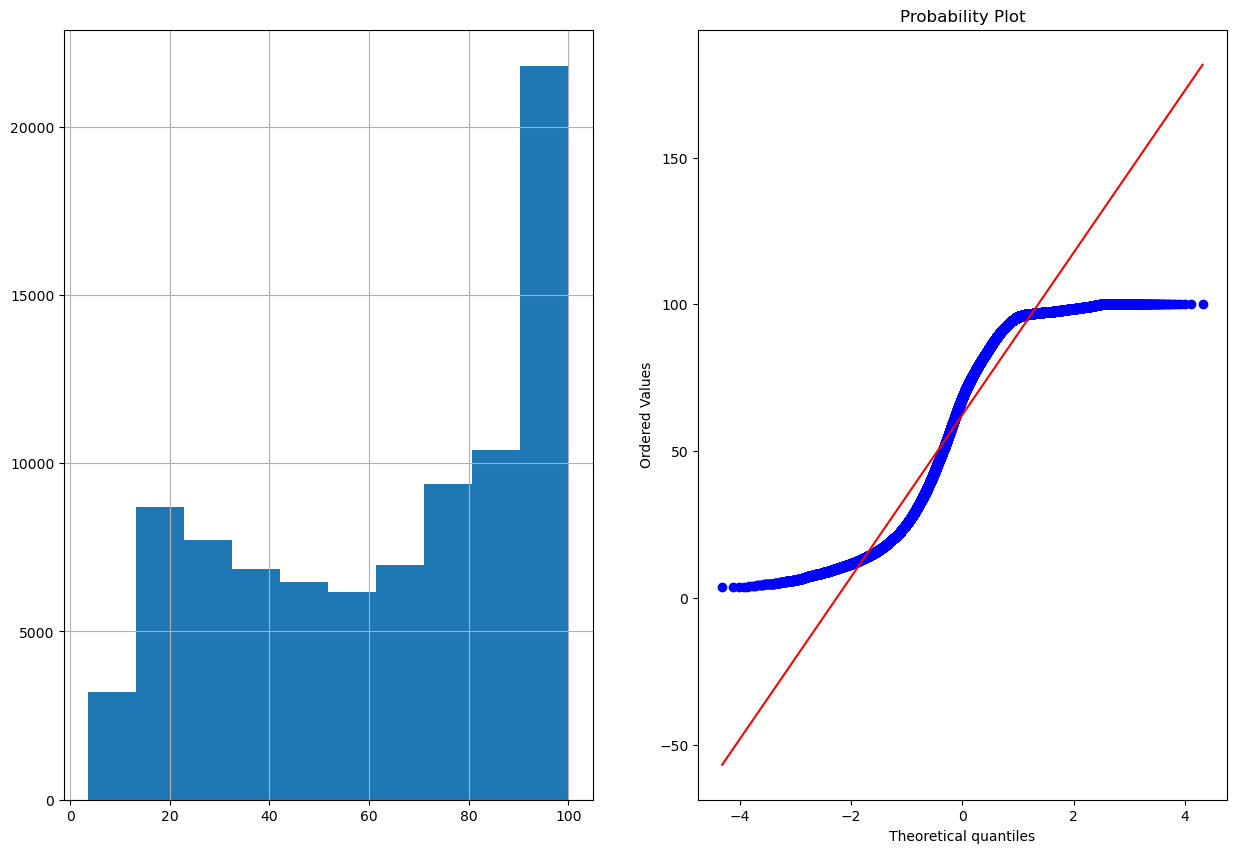

PRECTOTCORR


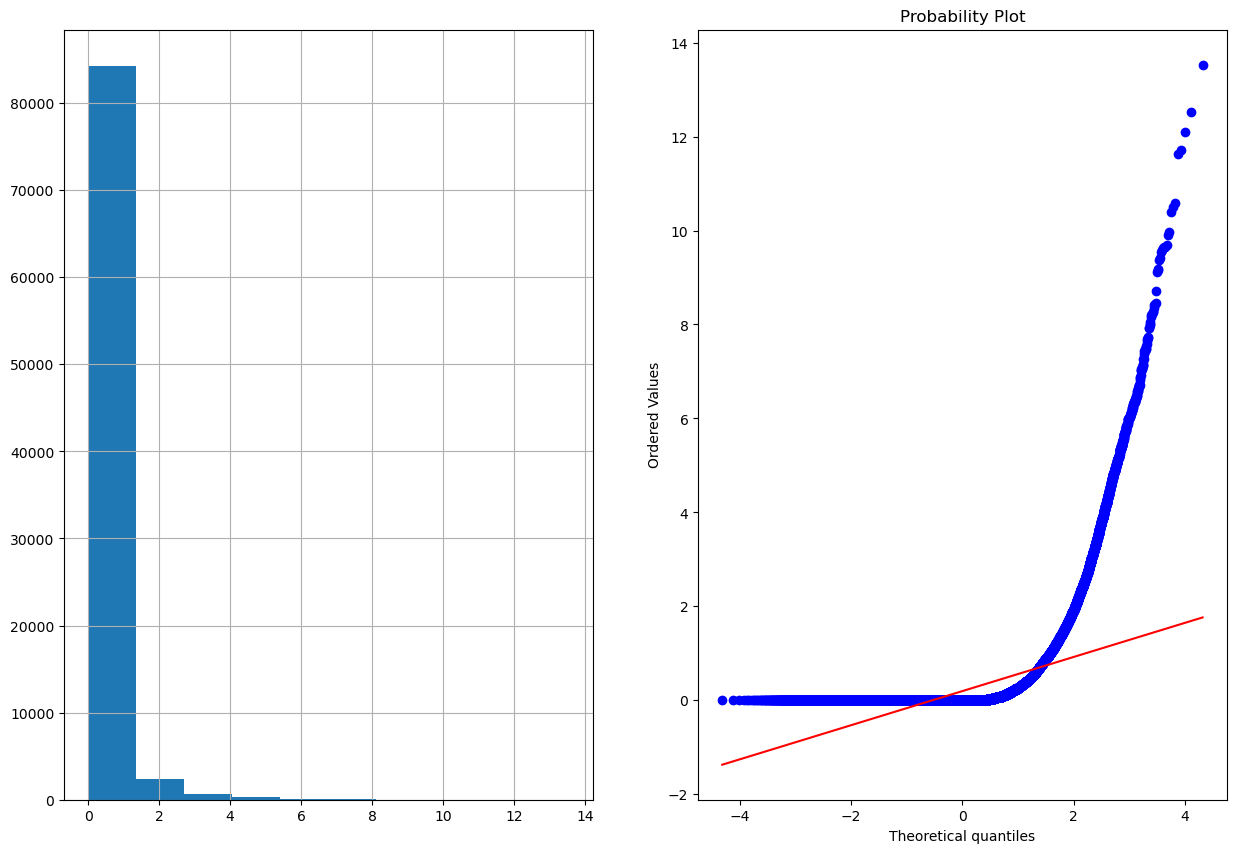

WS50M


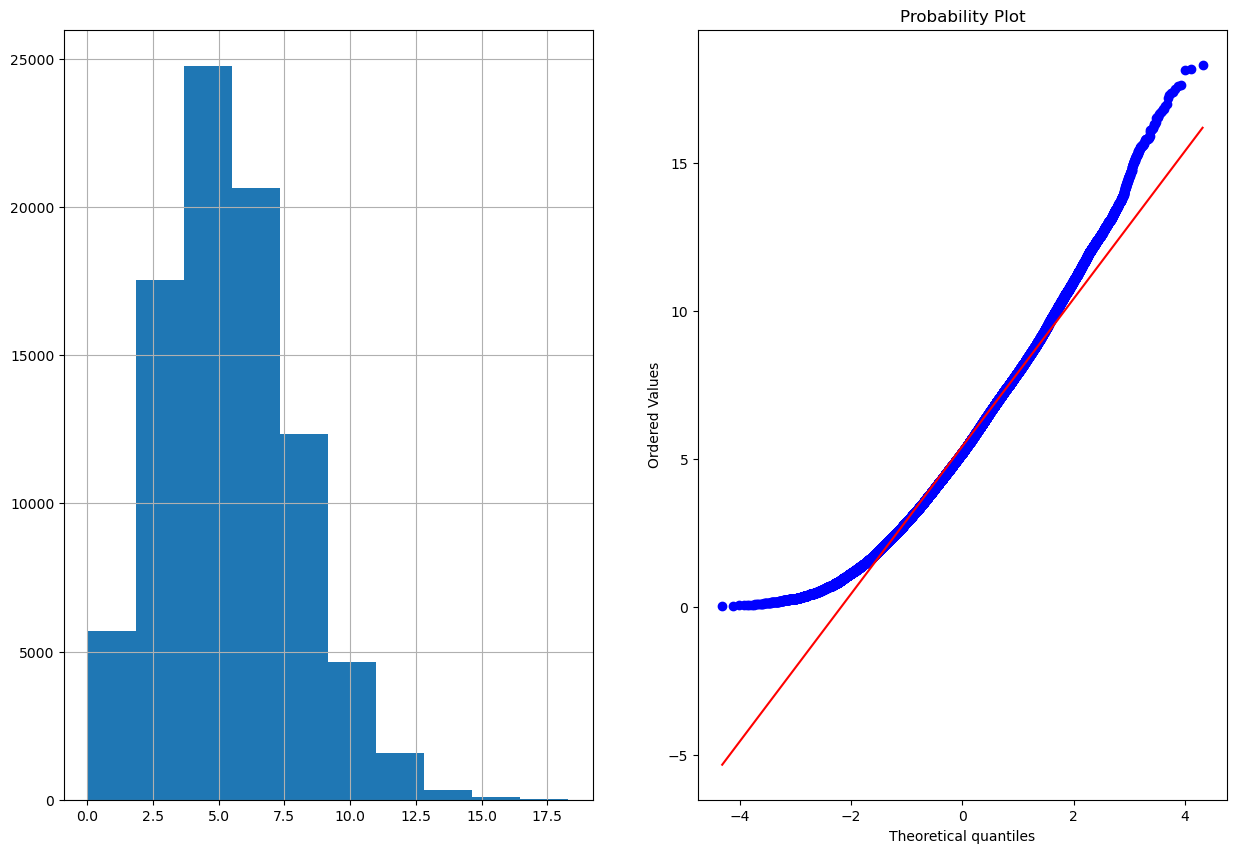

WD50M


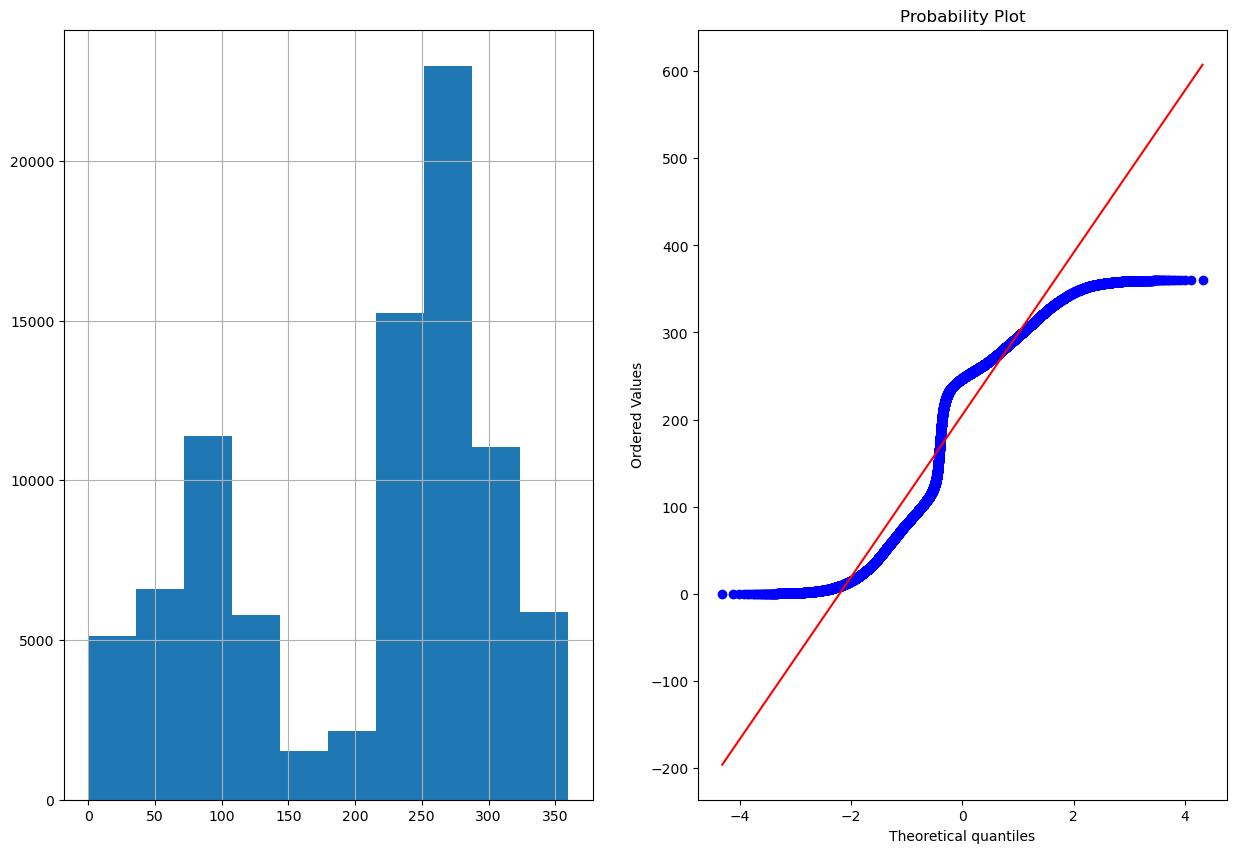

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.000e+00, 1.000e-02, 3.000e-02, 1.100e-01, 7.000e-02, 2.000e-02,
       5.000e-02, 6.000e-02, 4.000e-02, 1.500e-01, 2.000e-01, 2.700e-01,
       2.400e-01, 4.400e-01, 7.900e-01, 2.200e-01, 3.600e-01, 4.700e-01,
       5.500e-01, 6.600e-01, 5.800e-01, 8.700e-01, 2.040e+00, 8.000e-02,
       9.000e-02, 1.200e-01, 1.900e-01, 1.600e-01, 1.800e-01, 2.300e-01,
       3.800e-01, 1.000e-01, 1.600e+00, 3.040e+00, 2.530e+00, 3.510e+00,
       2.230e+00, 9.200e-01, 2.500e-01, 2.280e+00, 4.000e-01, 1.300e-01,
       1.700e-01, 2.100e-01, 3.400e-01, 3.900e-01, 5.100e-01, 5.700e-01,
       6.900e-01, 9.400e-01, 1.280e+00, 1.420e+00, 1.540e+00, 1.960e+00,
       1.500e+00, 1.260e+00, 1.460e+00, 1.680e+00, 1.490e+00, 1.310e+00,
       1.160e+00, 1.140e+00, 1.020e+00, 9.100e-01, 7.600e-01, 8.200e-01,
       8.900e-01, 3.500e-01, 4.900e-01, 1.070e+00, 1.090e+00, 1.120e+00,
       1.100e+00, 6.000e-01, 3.100e-01, 3.000e-01, 2.600e-01, 2.800e-01,
       5.600e-01, 1.400e-01, 3.200e-01, 3.300e-01, 

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([1., 0.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,22.47,1.0
1,23.50,1.0
2,27.74,1.0
3,32.95,1.0
4,36.08,1.0
...,...,...
87643,22.23,1.0
87644,21.68,1.0
87645,21.01,1.0
87646,20.40,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,22.47,1.0,5
1,23.50,1.0,6
2,27.74,1.0,7
3,32.95,1.0,8
4,36.08,1.0,9
...,...,...,...
87643,22.23,1.0,0
87644,21.68,1.0,1
87645,21.01,1.0,2
87646,20.40,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,22.47,1.0,5,1
1,23.50,1.0,6,1
2,27.74,1.0,7,1
3,32.95,1.0,8,1
4,36.08,1.0,9,1
...,...,...,...,...
87643,22.23,1.0,0,1
87644,21.68,1.0,1,1
87645,21.01,1.0,2,1
87646,20.40,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,22.47,1.0,5,1,4
1,23.50,1.0,6,1,4
2,27.74,1.0,7,1,4
3,32.95,1.0,8,1,4
4,36.08,1.0,9,1,4
...,...,...,...,...,...
87643,22.23,1.0,0,1,4
87644,21.68,1.0,1,1,4
87645,21.01,1.0,2,1,4
87646,20.40,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,22.47,1.0,5,1,4,2012
1,23.50,1.0,6,1,4,2012
2,27.74,1.0,7,1,4,2012
3,32.95,1.0,8,1,4,2012
4,36.08,1.0,9,1,4,2012
...,...,...,...,...,...,...
87643,22.23,1.0,0,1,4,2022
87644,21.68,1.0,1,1,4,2022
87645,21.01,1.0,2,1,4,2022
87646,20.40,1.0,3,1,4,2022


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,22.47,1.0,5,1,4,2012
1,23.50,1.0,6,1,4,2012
2,27.74,1.0,7,1,4,2012
3,32.95,1.0,8,1,4,2012
4,36.08,1.0,9,1,4,2012
...,...,...,...,...,...,...
87643,22.23,1.0,0,1,4,2022
87644,21.68,1.0,1,1,4,2022
87645,21.01,1.0,2,1,4,2022
87646,20.40,1.0,3,1,4,2022


In [33]:
d12['PRECTOTCORR'].unique()

array([1., 0.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,22.47,1.0,5,1,4,2012,39.19
1,23.50,1.0,6,1,4,2012,36.44
2,27.74,1.0,7,1,4,2012,28.00
3,32.95,1.0,8,1,4,2012,18.12
4,36.08,1.0,9,1,4,2012,13.12
...,...,...,...,...,...,...,...
87643,22.23,1.0,0,1,4,2022,28.81
87644,21.68,1.0,1,1,4,2022,28.31
87645,21.01,1.0,2,1,4,2022,28.25
87646,20.40,1.0,3,1,4,2022,28.88


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,22.47,1.0,5,1,4,2012,39.19,2.94
1,23.50,1.0,6,1,4,2012,36.44,3.09
2,27.74,1.0,7,1,4,2012,28.00,2.89
3,32.95,1.0,8,1,4,2012,18.12,3.40
4,36.08,1.0,9,1,4,2012,13.12,3.51
...,...,...,...,...,...,...,...,...
87643,22.23,1.0,0,1,4,2022,28.81,2.91
87644,21.68,1.0,1,1,4,2022,28.31,2.90
87645,21.01,1.0,2,1,4,2022,28.25,3.10
87646,20.40,1.0,3,1,4,2022,28.88,3.25


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,22.47,1.0,5,1,4,2012,39.19,2.94,2.94
1,23.50,1.0,6,1,4,2012,36.44,3.09,3.09
2,27.74,1.0,7,1,4,2012,28.00,2.89,2.89
3,32.95,1.0,8,1,4,2012,18.12,3.40,3.40
4,36.08,1.0,9,1,4,2012,13.12,3.51,3.51
...,...,...,...,...,...,...,...,...,...
87643,22.23,1.0,0,1,4,2022,28.81,2.91,2.91
87644,21.68,1.0,1,1,4,2022,28.31,2.90,2.90
87645,21.01,1.0,2,1,4,2022,28.25,3.10,3.10
87646,20.40,1.0,3,1,4,2022,28.88,3.25,3.25


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

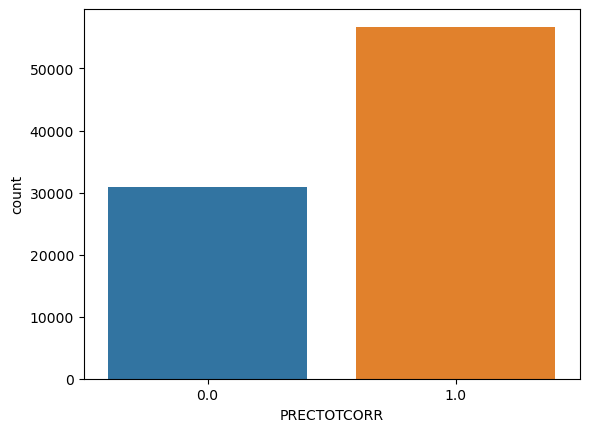

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("Nashik-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,22.47,1.0,5,1,4,2012,39.19,2.94,2.94
1,23.50,1.0,6,1,4,2012,36.44,3.09,3.09
2,27.74,1.0,7,1,4,2012,28.00,2.89,2.89
3,32.95,1.0,8,1,4,2012,18.12,3.40,3.40
4,36.08,1.0,9,1,4,2012,13.12,3.51,3.51
...,...,...,...,...,...,...,...,...,...
87643,22.23,1.0,0,1,4,2022,28.81,2.91,2.91
87644,21.68,1.0,1,1,4,2022,28.31,2.90,2.90
87645,21.01,1.0,2,1,4,2022,28.25,3.10,3.10
87646,20.40,1.0,3,1,4,2022,28.88,3.25,3.25
